In [58]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.interpolate import CubicHermiteSpline as CHermite 
from scipy.interpolate import CubicSpline
from scipy.optimize import newton

# Problema 1. Automovil
 
Un automóvil que viaja a lo largo de una carretera recta es cronometrado en varios puntos. Los datos de las observaciones se dan en la siguiente tabla, donde el tiempo está en segundos, la distancia en metros y la velocidad en metros por segundo.
 
```
tiempos = np.array([0, 3, 5, 8, 13]) # segundos
distancias = np.array([0, 225, 383, 623, 993]) # metros
velocidades = np.array([75, 77, 80, 74, 72]) # metros/segundo
``` 
- Usar un polinomio de Hermite y de Splines Cúbicos para predecir la posición del automóvil y su velocidad cuando $t=10$ s.
- ¿Cuál es la velocidad máxima predicha para el automóvil en cada caso?

La posicion y velocidad en t= 10s es, respectivamente:
Segun la interpolacion de hermite 771.96m y 72.48m/s
Segun CubicSPlines 774.8639004149377m y 71.44995850622406m/s


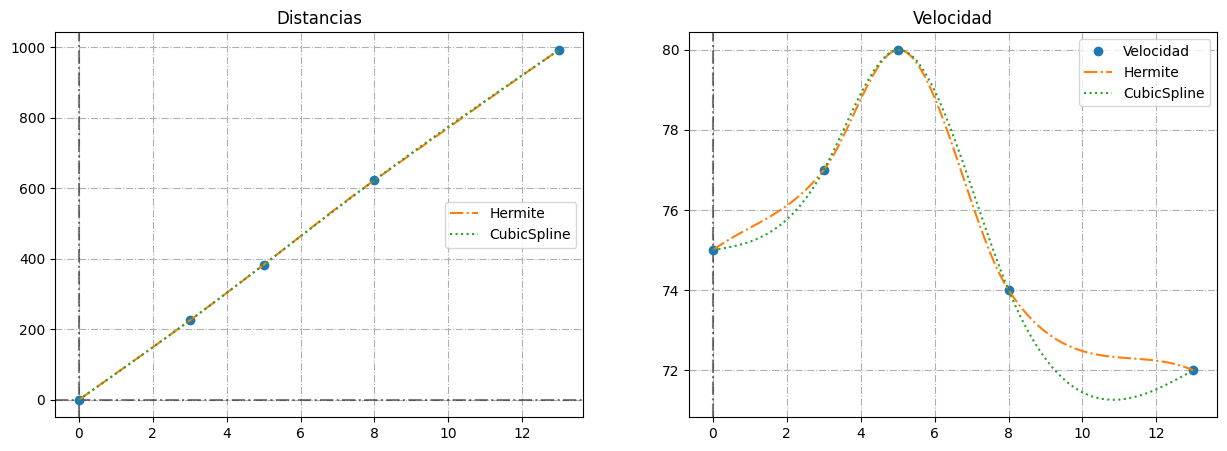

In [3]:
# Datos del problema
tiempos = np.array([0, 3, 5, 8, 13]) # segundos
distancias = np.array([0, 225, 383, 623, 993]) # metros
velocidades = np.array([75, 77, 80, 74, 72]) # metros/segundo

# Calculo de la aceleracion (derivada de la velocidad para la interpolacion de hermite)
aceleracion = np.gradient(velocidades, tiempos)

# formulas de interpolacion para cada caso
formulaHermite_distancias = CHermite(tiempos, distancias, velocidades)
formulaCubic_distancias = CubicSpline(tiempos, distancias, bc_type= 'natural')

formulaHermite_velocidad = CHermite(tiempos, velocidades, aceleracion)
formulaCubic_velocidad = CubicSpline(tiempos,velocidades, bc_type= 'natural')

print(f'La posicion y velocidad en t= 10s es, respectivamente:\nSegun la interpolacion de hermite {formulaHermite_distancias(10)}m y {formulaHermite_velocidad(10)}m/s')
print(f'Segun CubicSPlines {formulaCubic_distancias(10)}m y {formulaCubic_velocidad(10)}m/s')

# interpolacion para graficar
x_P1 = np.linspace(min(tiempos), max(tiempos), 100)
y_hermite_distancia = formulaHermite_distancias(x_P1)
y_cubic_distancia = formulaCubic_distancias(x_P1)

y_hermite_velocidad = formulaHermite_velocidad(x_P1)
y_cubic_velocidad = formulaCubic_velocidad(x_P1)

'''------------------------------------------Graficas------------------------------------------'''
fig, ax = plt.subplots(1, 2, figsize= (15, 5))

#Distancia
ax[0].set_title('Distancias')

ax[0].axhline(color= 'Black', linestyle= '-.', alpha= 0.5)
ax[0].axvline(color= 'Black', linestyle= '-.', alpha= 0.5)

ax[0].plot(tiempos, distancias, 'o')
ax[0].plot(x_P1, y_hermite_distancia, '-.',label= 'Hermite')
ax[0].plot(x_P1, y_cubic_distancia, ':',label= 'CubicSpline')

ax[0].grid(linestyle= '-.')
ax[0].legend()

#Velocidad
ax[1].set_title('Velocidad')

ax[1].axvline(color= 'Black', linestyle= '-.', alpha= 0.5)

ax[1].plot(tiempos, velocidades, 'o', label= 'Velocidad')
ax[1].plot(x_P1, y_hermite_velocidad, '-.',label= 'Hermite')
ax[1].plot(x_P1, y_cubic_velocidad, ':',label= 'CubicSpline')

ax[1].grid(linestyle= '-.')
ax[1].legend()

La velocidad maxima predicha en ambos casos con hermite y cubic splines es de 80m/s

# Problema 2. Gravedad
Los valores de la aceleración gravitacional $g$ dependen de la altitud $y$ según se muestra en la tabla. Utilice el método de diferencias divididas de Newton para estimar el valor de la aceleración gravitacional a las altitudes de 5,000 m, 42,000 m y 90,000 m. Grafique la distribución de la función de interpolación obtenida junto con los datos dados.
 
```
y = [0, 20000, 40000, 60000, 80000]  # en metros
g = [9.8100, 9.7487, 9.6879, 9.6278, 9.5682]  # en m/s²
```


In [4]:
def dif_Div(xList, yList, j, i= 0):
    '''
    Calcula las diferencias divididas para realizar la interpolacion de newton

    Entradas:
        -xList: Lista de puntos en x
        -yList: Lista de puntos en y
        -j: diferencia a calcular
        -i: Se usa para recalcular las diferencias necesarias para j mayores, por defento en 0 para evitar errores
    Salidas:
        Diferencia en j
    '''

    if i == j:
        return yList[i]
    else:
        return (dif_Div(xList, yList, j, i=i+1) - dif_Div(xList, yList, j-1, i=i))/(xList[j] - xList[i])

def coef_newton(xList, yList):
    '''  
    Calcula los coeficientes de la interpolacion de newton en base a las diferencias divididas

    Entradas:
        -xList: Lista de puntos en x
        -yList: Lista de puntos en y
    Salidas:
        lista de coeficientes
    '''

    coef = np.zeros_like(xList, dtype=float)

    for j in range(len(xList)):
        coef[j] = dif_Div(xList, yList, j)
    
    return coef

def inter_Newton(xList, yList, x):
    '''  
    Calcula la interpolacion para x punto usando diferencias divididas de newton en base a una lista de puntos

    Entradas:
        -xList: Lista de puntos en x
        -yList: Lista de puntos en y
        -x: Punto para evaluar la interpolacion
    Salidas:
        valor de f(x) de la interpolacion
    '''
    a = coef_newton(xList, yList)
    P = a[0]

    producto = 1
    for j in range(1, len(xList)):

        producto *= (x - xList[j-1]) 
        P += a[j]*producto
    
    return P

Para latitud = 5000 la gravedad es: 9.79462812822917m/s²
Para latitud = 42000 la gravedad es: 9.681847504850051m/s²
Para latitud = 90000 la gravedad es: 9.535403139225952m/s²



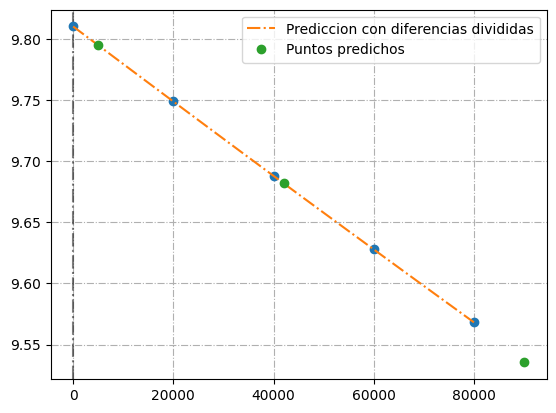

In [5]:
#Datos
y = [0, 20000, 40000, 60000, 80000]  # en metros
g = [9.8100, 9.7487, 9.6879, 9.6278, 9.5682]  # en m/s²

#Predicciones pedidas
y_Predicciones = np.array([5000, 42000, 90000])

#Interpolacion
x_P2 = np.linspace(min(y), max(y), 100)
g_difNewton_P2 = inter_Newton(y, g, x_P2)

g_Predicciones = inter_Newton(y, g, y_Predicciones)

print(
    f'Para latitud = {y_Predicciones[0]} la gravedad es: {g_Predicciones[0]}m/s²\n'
    f'Para latitud = {y_Predicciones[1]} la gravedad es: {g_Predicciones[1]}m/s²\n'
    f'Para latitud = {y_Predicciones[2]} la gravedad es: {g_Predicciones[2]}m/s²\n'
)

#Grafica
plt.axvline(0.0, color='black', alpha=0.5, linestyle='-.')

plt.plot(y, g, 'o')
plt.plot(x_P2, g_difNewton_P2, '-.', label= 'Prediccion con diferencias divididas')
plt.plot(y_Predicciones, g_Predicciones, 'o', label= 'Puntos predichos')

plt.grid(linestyle='-.')
plt.legend()

# Problema 3. Densidad del aire
La densidad del aire ρ depende de la temperatura T como se muestra en la tabla. Utilice el método de diferencias divididas de Newton para estimar los valores de la densidad del aire a 250 K, 800 K y 3,000 K. Luego, determine la densidad del aire a temperaturas desde 100 K hasta 2,500 K en intervalos de 10 K. Grafique la distribución de la densidad del aire calculada en función de la temperatura.

```
T = np.array([100, 200, 300, 500, 700, 1000, 1500, 2000, 2500]) # en K
rho = np.array([3.6010, 1.7684, 1.1774, 0.7048, 0.5030, 0.3524, 0.2355, 0.1762, 0.1394]) # en kg/m^3
```

Para T = 250.0K la densidad es: 1.3975329155606775kg/m^3
Para latitud = 800.0K la densidad es: 0.4964089902361964kg/m^3
Para latitud = 3000.0K la densidad es: 1561.165866794854kg/m^3



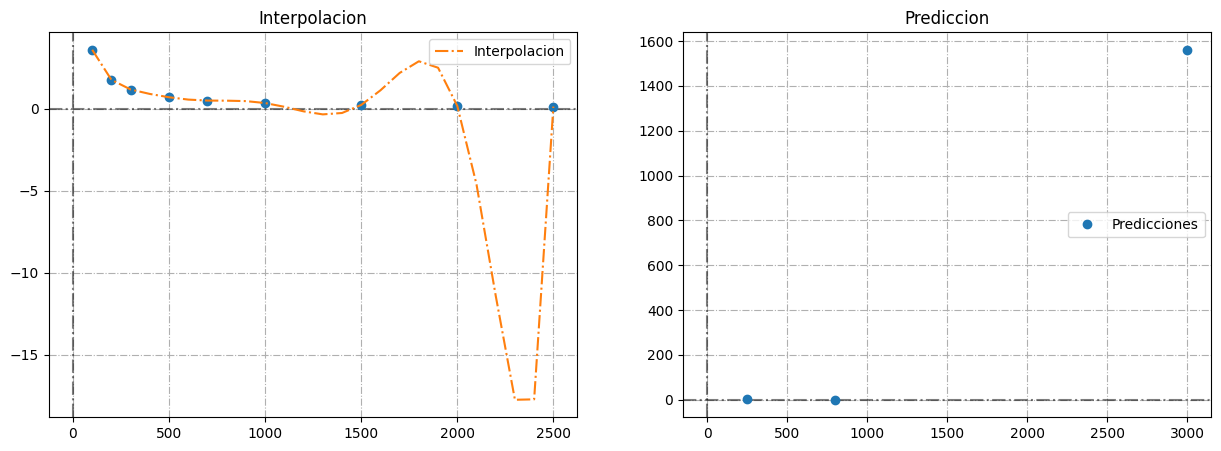

In [52]:
#Datos
T = np.array([100, 200, 300, 500, 700, 1000, 1500, 2000, 2500]) # en K
rho = np.array([3.6010, 1.7684, 1.1774, 0.7048, 0.5030, 0.3524, 0.2355, 0.1762, 0.1394]) # en kg/m^3

T1_estimaciones = np.array([250.0, 800.0, 3000.0])

T_interpolado = np.arange(100.0, 2600.0, 100)
rho_interpolado = inter_Newton(T, rho, T_interpolado)

rho_estimaciones = inter_Newton(T, rho, T1_estimaciones)

print(
    f'Para T = {T1_estimaciones[0]}K la densidad es: {rho_estimaciones[0]}kg/m^3\n'
    f'Para latitud = {T1_estimaciones[1]}K la densidad es: {rho_estimaciones[1]}kg/m^3\n'
    f'Para latitud = {T1_estimaciones[2]}K la densidad es: {rho_estimaciones[2]}kg/m^3\n'
)

'''------------------------------------------Graficas------------------------------------------'''
fig, ax = plt.subplots(1, 2, figsize= (15,5))

#Interpolacion
ax[0].set_title('Interpolacion')

ax[0].axvline(0.0, color='black', alpha=0.5, linestyle='-.')
ax[0].axhline(0.0, color='black', alpha=0.5, linestyle='-.')

ax[0].plot(T, rho, 'o')
ax[0].plot(T_interpolado, rho_interpolado, '-.', label= 'Interpolacion')

ax[0].grid(linestyle='-.')
ax[0].legend()

#Prediccion
ax[1].set_title('Prediccion')

ax[1].axvline(0.0, color='black', alpha=0.5, linestyle='-.')
ax[1].axhline(0.0, color='black', alpha=0.5, linestyle='-.')

ax[1].plot(T1_estimaciones, rho_estimaciones, 'o', label= 'Predicciones')

ax[1].grid(linestyle='-.')
ax[1].legend()

# Problema 4. Termometro de resistencias
Uno de los dispositivos más precisos para medir temperatura es el termómetro de resistencia de platino, también conocido como RTD. En este dispositivo, un alambre delgado y largo de platino se enrolla alrededor de un carrete y se encapsula en una cubierta de acero inoxidable. La resistencia del alambre cambia de manera muy lineal con la temperatura. Una longitud típica de alambre tiene una resistencia de aproximadamente 100 $\Omega$ a $0^{\circ}$ C y cambia alrededor de 0.39 $\Omega/^{\circ}$ C. Por lo tanto, para medir temperaturas con precisión, es necesario poder medir cambios en la resistencia con alta resolución. Tradicionalmente, se ha utilizado el circuito de puente desequilibrado para esto, como se ilustra en la figura, el cual proporciona un voltaje de salida pequeño que es proporcional (aunque no linealmente) a la resistencia del sensor.

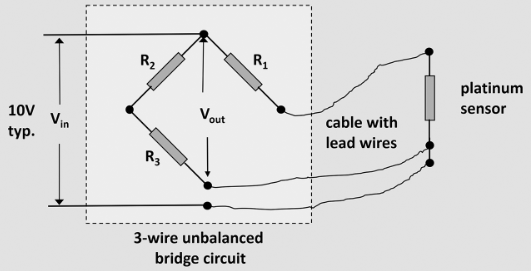




A continuación se presentan mediciones tomadas de dicho circuito, con $R_1 = R_2 = 5$ $k\Omega$ y $R_3 = 120$ $\Omega$:
 
```
resistencia = np.array([100, 115, 130, 145, 160, 175])  # Resistencia del sensor (Ohms)
voltaje = np.array([0.45244, 0.10592, -0.19918, -0.46988, -0.71167, -0.92896])  # Salida del puente (V)
```

Un termómetro de resistencia de platino estándar de 100 $\Omega$ tiene una resistencia de 139.27 $\Omega$ a $100^\circ$ C. Utilice el método de interpolación que desee para estimar el voltaje de salida del puente en estas condiciones. Si la salida del puente se mide en 0 voltios, estime la resistencia medida. ¿Qué conclusión puede obtener?

El voltaje es cero cuando se mide una resistencia de aproximadamente 119.96794057155408
El voltaje a 139.27 Ohms y a 100° es de: -0.3699510277321739


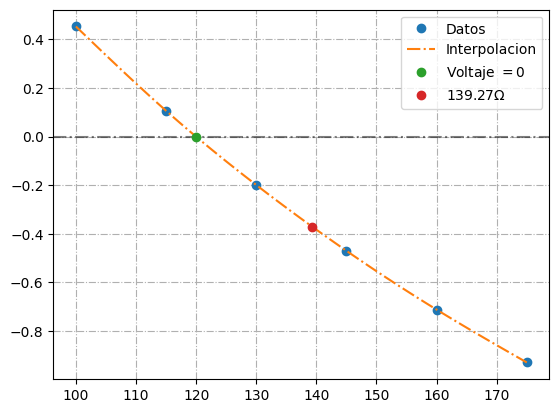

In [66]:
resistencia = np.array([100, 115, 130, 145, 160, 175])  # Resistencia del sensor (Ohms)
voltaje = np.array([0.45244, 0.10592, -0.19918, -0.46988, -0.71167, -0.92896])  # Salida del puente (V)

Ohms = np.linspace(min(resistencia), max(resistencia), 100)
Ohms_interpolado = CubicSpline(resistencia, voltaje, bc_type= 'natural')
V_interpolado = Ohms_interpolado(Ohms)

#Voltaje = 0
R_0 = newton(Ohms_interpolado, 115, x1= 130)
V_0 = Ohms_interpolado(R_0)

print(f'El voltaje es cero cuando se mide una resistencia de aproximadamente {R_0}')

Ohm = 139.27
voltaje_139 = Ohms_interpolado(Ohm)

print(f'El voltaje a {Ohm} Ohms y a 100° es de: {voltaje_139}')

plt.axhline(color= 'Black', linestyle= '-.', alpha= 0.5)

plt.plot(resistencia, voltaje, 'o', label= 'Datos')
plt.plot(Ohms, V_interpolado, '-.', label= 'Interpolacion')
plt.plot(R_0, V_0, 'o', label= 'Voltaje $= 0$')
plt.plot(Ohm, voltaje_139, 'o', label= r'$139.27\Omega$ ')

plt.grid(linestyle= '-.')
plt.legend()

# Problema 5. Indices de refraccion
El índice de refracción del vidrio de borosilicato a diferentes longitudes de onda se presenta en la siguiente tabla. Estime la longitud de onda donde el índice de refracción es 1.520.
 
```
lambda_angstrom = np.array([6563, 6439, 5890, 5338, 5086, 4861, 4340, 3988])  # en Å
indice_refraccion = np.array([1.50883, 1.50917, 1.51124, 1.51386, 1.51534, 1.51690, 1.52136, 1.52546])
```

La longitud de onda para un indice de refraccion de 1.52 es de: 4.4809640823086985e-06


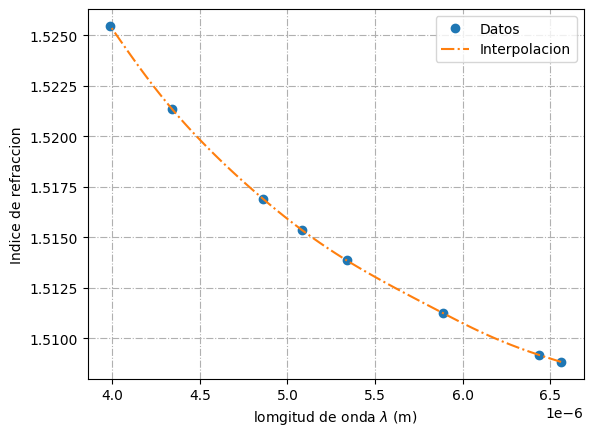

In [46]:
amstrong = 10e-10 #amstrongs en metros

lambda_angstrom = np.array([6563, 6439, 5890, 5338, 5086, 4861, 4340, 3988]) * amstrong  # en m
indice_refraccion = np.array([1.50883, 1.50917, 1.51124, 1.51386, 1.51534, 1.51690, 1.52136, 1.52546])

refraccion_interpolado = CubicSpline(indice_refraccion, lambda_angstrom, bc_type= 'natural')

indices = np.linspace(min(indice_refraccion), max(indice_refraccion), 100)
lambda_interpolado = refraccion_interpolado(indices)

refraccion = 1.520
lambda_prediccion = refraccion_interpolado(refraccion)

print(f'La longitud de onda para un indice de refraccion de {refraccion} es de: {lambda_prediccion}')

plt.plot(lambda_angstrom, indice_refraccion, 'o', label= 'Datos')
plt.plot(lambda_interpolado, indices, '-.', label= 'Interpolacion')

plt.xlabel(r'lomgitud de onda $\lambda$ (m)')
plt.ylabel('Indice de refraccion')

plt.grid(linestyle= '-.')
plt.legend()